<a href="https://colab.research.google.com/github/birendradhami777/AI-Lab-Report/blob/main/NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

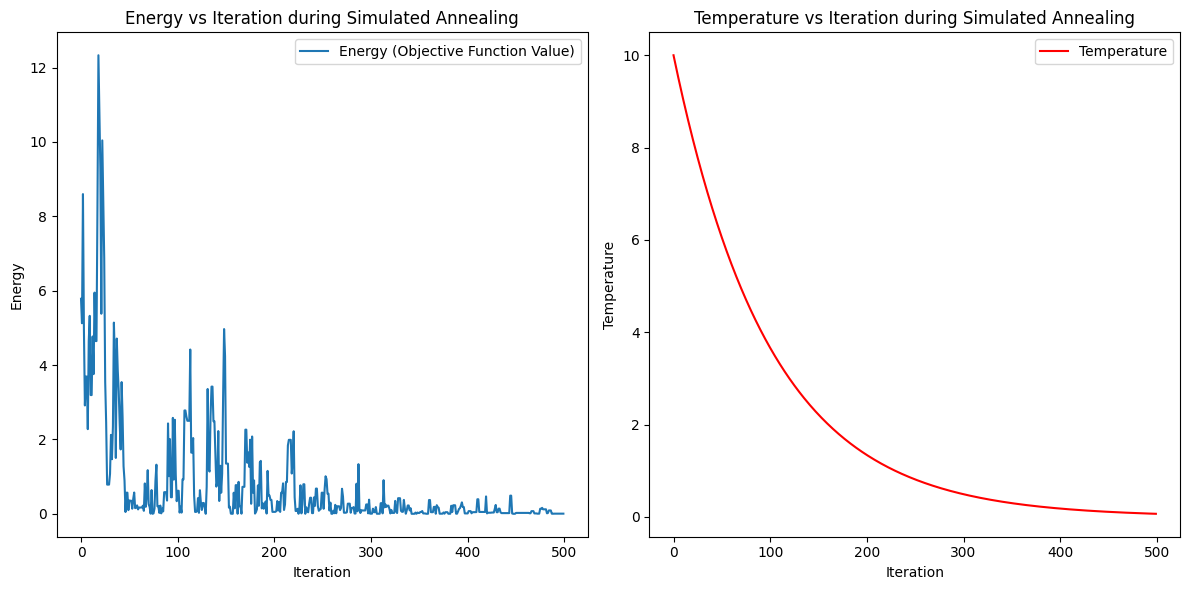

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function to minimize (simple quadratic function: f(x) = x^2)
def objective_function(x):
    """The objective function we aim to minimize. Here, it's a simple quadratic function."""
    return x ** 2

# Metropolis criterion: calculates the probability of accepting a worse solution
def metropolis(current_energy, new_energy, temperature):
    """Decides whether to accept a worse solution based on the Metropolis criterion."""
    # If the new solution is better (lower energy), always accept it
    if new_energy < current_energy:
        return 1  # Always accept if the new solution is better

    # If the new solution is worse, accept it with a probability based on temperature
    else:
        # The probability decreases as the temperature lowers and as the solution worsens
        return np.exp(-(new_energy - current_energy) / temperature)

# Simulated Annealing Process: iteratively improve the solution
def simulated_annealing(start_temp, end_temp, cooling_rate, max_iterations):
    """Performs simulated annealing to minimize an objective function."""
    # Start with a random solution in the range of [-10, 10]
    current_temperature = start_temp
    current_state = np.random.uniform(-10, 10)  # Random start position for the solution
    current_energy = objective_function(current_state)  # Energy (cost) of the current state

    # To track the progress of the algorithm
    energies = []  # List to store the energy at each iteration
    states = []  # List to store the state (solution) at each iteration
    temperatures = []  # List to track the temperature at each iteration

    # Iterate for a set number of times or until the temperature is low enough
    for iteration in range(max_iterations):
        # Generate a neighboring state by making a small random change
        new_state = current_state + np.random.uniform(-1, 1)  # Random move in the solution space
        new_energy = objective_function(new_state)  # Energy (cost) of the new state

        # Calculate the probability of accepting the new state using the Metropolis criterion
        acceptance_probability = metropolis(current_energy, new_energy, current_temperature)

        # Decide whether to move to the new state based on the probability
        if np.random.rand() < acceptance_probability:
            # Accept the new state if the random number is less than the acceptance probability
            current_state = new_state
            current_energy = new_energy  # Update the energy of the current state

        # Store the state, energy, and temperature for plotting later
        energies.append(current_energy)
        states.append(current_state)
        temperatures.append(current_temperature)

        # Gradually reduce the temperature according to the cooling schedule
        current_temperature *= cooling_rate

    return states, energies, temperatures

# Parameters for the annealing process
start_temperature = 10.0  # Initial high temperature
end_temperature = 0.1  # Minimum temperature
cooling_rate = 0.99  # Cooling rate (temperature reduction factor)
max_iterations = 500  # Maximum number of iterations (steps)

# Run the Simulated Annealing algorithm
states, energies, temperatures = simulated_annealing(start_temperature, end_temperature, cooling_rate, max_iterations)

# Plotting the results to visualize the process

plt.figure(figsize=(12, 6))

# Plot 1: Energy (Objective Function Value) vs Iteration
plt.subplot(1, 2, 1)
plt.plot(energies, label="Energy (Objective Function Value)")
plt.xlabel("Iteration")
plt.ylabel("Energy")
plt.title("Energy vs Iteration during Simulated Annealing")
plt.legend()

# Plot 2: Temperature vs Iteration
plt.subplot(1, 2, 2)
plt.plot(temperatures, label="Temperature", color="red")
plt.xlabel("Iteration")
plt.ylabel("Temperature")
plt.title("Temperature vs Iteration during Simulated Annealing")
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()